In [1]:
#importing important packages necessary to notebook
import numpy as np
from sklearn.datasets import load_digits #ready available data set
from sklearn.model_selection import train_test_split  #function that divides up data
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  #plotting
import seaborn as sns            #and visualization
import pandas as pd
%matplotlib inline

In [2]:
#styling notebook
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
#getting the data set
data_csv =  pd.read_csv("f444w.csv")
#list indices must be integers or slices, not float, error from below when tried to do floats
data_csv = data_csv.astype('int')
data_csv.head()
#type(data_csv) - is a dataframe

,xcentroid,ycentroid,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,...,R1_fluxerr,R2_flux,R2_fluxerr,R3_flux,R3_fluxerr,gini,fwhm,cxx,cxy,cyy
0,4053,97,94,2,1,-9,0,1,55,0,...,2,1006,3,1232,6,0,4,0,0,0
1,5346,134,15,1,0,37,0,1,2,0,...,1,67,2,85,4,0,2,0,0,1
2,4587,166,38,1,1,-13,0,1,5,0,...,1,146,2,234,5,0,3,0,0,0
3,4164,187,15,1,0,-40,0,2,4,0,...,1,87,2,127,5,0,2,1,1,1
4,3862,348,123,3,2,3,0,1,7,0,...,1,346,3,678,6,0,6,0,0,0


In [4]:
#seeing how many rows
#data_csv.xcentroid.value_counts()
#result: Name: xcentroid, Length: 17401, dtype: int64

#organize by area instead
data_csv.area.value_counts()
pd.set_option("display.max_rows", 10)  #can change the number to "None" to print all the values
print(data_csv.area.value_counts())

9       584
6       579
7       565
8       562
5       501
       ... 
1630      1
1777      1
509       1
4006      1
764       1
Name: area, Length: 1066, dtype: int64


In [5]:
print(data_csv.local_background.value_counts())

0    17401
Name: local_background, dtype: int64


In [6]:
#beyond the 2d visualization, umap helps see internal structure of the data, intuition
#need umap object
import umap

In [7]:
reducer = umap.UMAP()

In [8]:
#cleaning up data
#convert each feature into z-scores (number of standard deviations from the mean) for comparability
data = data_csv[
    [
        "xcentroid",
        "ycentroid",
        "area",
        "semimajor_sigma",
        "semiminor_sigma",
        "orientation",
        "eccentricity",
        "min_value",
        "max_value",
        "local_background",
       	"segment_flux",
        "segment_fluxerr",
        "kron_flux",
        "kron_fluxerr",
        "kron_radius",
        "R0_flux",
        "R0_fluxerr",
        "R1_flux",	
        "R1_fluxerr",
        "R2_flux",
        "R2_fluxerr",
        "R3_flux",
        "R3_fluxerr",
        "gini",
        "fwhm",
        "cxx",
        "cxy",
        "cyy"
    ]
].values
scaled_data = StandardScaler().fit_transform(data)

In [9]:
#training the reducer so it can learn about the manifold
#returns as array
embedding = reducer.fit_transform(scaled_data)
embedding.shape
#2d is the default

(17401, 2)

## Attempting to plot without c, c=local bg and then area

Text(0.5, 1.0, 'UMAP projection of the dataset')

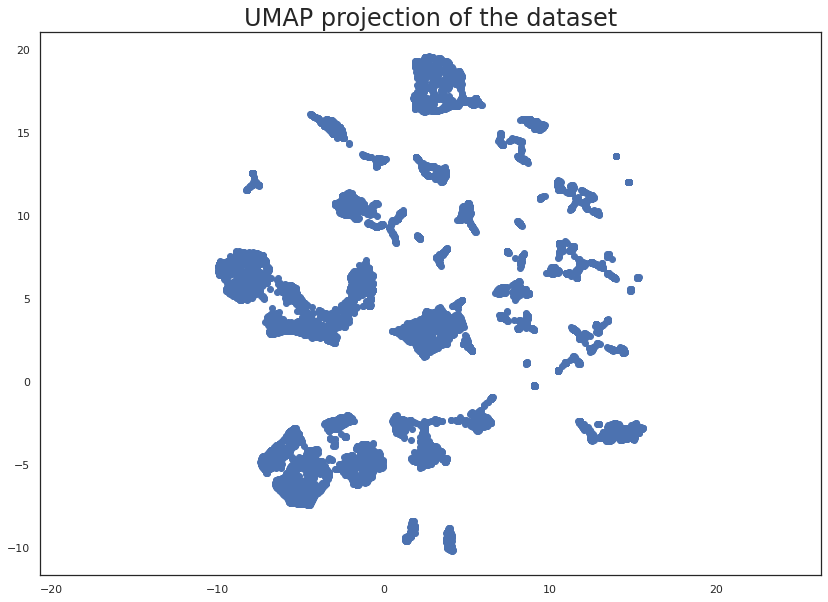

In [11]:
#what if i just ignore c...
#this is weird, how does it know what data i am talking about??
    #through the embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
    #list indices must be integers or slices, not float
    #c=data_csv
   ) 
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [ ]:
#hopefully simpler before tackling area
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #list indices must be integers or slices, not float
    c=[sns.color_palette()[x] for x in data_csv.local_background.map({"0":0})]) 
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

Below is code trying to color code by area

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in data_csv.area.map({"9":0, "6":1, "7":2, "8":3, "5":4, 
                                                          "10":5, "13":6, "14":7, "11":8,  "16":9, "12":10,
                                                          "15":11, "17":12, "18":13, "19":14, "20":15,
                                                          
                                                         })])
21       297
22       289
24       257
23       247
25       240
27       232
28       231
26       229
30       219
29       181
32       181
31       178
33       173
36       154
34       146
35       145
37       142
41       128
38       127
46       124
42       121
39       115
40       112
44       103
43        96
48        91
49        90
51        89
45        86
50        82
47        82
52        82
56        79
53        74
59        73
54        73
55        71
62        69
58        69
65        65
57        59
60        59
72        57
64        57
63        55
67        52
75        51
81        50
77        48
61        48
66        48
70        47
78        46
74        43
71        43
73        42
69        41
68        41
89        39
85        35
79        35
97        33
76        33
101       32
120       32
100       31
90        31
83        29
99        29
113       28
87        28
102       27
86        27
92        27
88        27
80        27
95        26
131       26
82        25
108       25
91        24
109       24
114       23
84        23
96        23
103       23
105       23
94        22
93        22
106       22
98        21
111       21
127       21
136       20
115       20
130       20
117       19
118       19
128       19
157       18
198       18
140       18
104       17
122       17
123       17
148       16
119       16
121       16
135       16
112       16
138       16
107       16
125       15
153       15
156       15
150       15
126       15
116       15
133       14
152       14
110       14
159       14
174       13
129       13
170       13
177       13
151       13
187       12
163       12
149       12
161       12
185       12
190       12
178       12
191       12
166       12
257       11
183       11
144       11
235       11
179       11
176       11
137       11
192       11
145       11
238       11
164       11
141       11
201       11
147       10
226       10
197       10
143       10
237       10
189       10
203       10
134       10
155       10
160       10
173       10
162       10
175       10
188       10
221        9
142        9
146        9
124        9
158        9
234        9
132        9
172        9
205        9
256        9
279        8
139        8
246        8
184        8
200        8
265        8
167        8
207        8
154        8
214        8
180        8
245        7
222        7
224        7
217        7
194        7
168        7
210        7
294        7
208        7
169        7
213        7
275        7
247        7
206        7
311        7
393        7
229        7
269        6
196        6
297        6
204        6
416        6
296        6
165        6
171        6
293        6
230        6
236        6
322        6
284        6
418        6
219        6
228        6
372        6
278        6
243        5
231        5
253        5
291        5
193        5
363        5
250        5
233        5
300        5
276        5
212        5
290        5
295        5
344        5
181        5
516        5
211        5
272        5
260        5
215        5
340        5
408        5
264        5
342        5
302        5
242        5
280        5
252        5
336        5
218        5
274        5
202        5
209        5
241        5
232        5
266        5
412        4
508        4
591        4
503        4
415        4
507        4
354        4
223        4
312        4
376        4
1178       4
463        4
355        4
263        4
254        4
313        4
423        4
287        4
383        4
417        4
227        4
475        4
484        4
285        4
251        4
182        4
639        4
346        4
304        4
356        4
466        4
255        4
349        4
325        4
533        4
449        4
199        4
476        4
539        4
186        4
465        4
462        4
453        4
357        4
441        4
332        4
338        4
309        4
240        4
458        3
438        3
877        3
318        3
306        3
352        3
220        3
398        3
420        3
661        3
343        3
307        3
353        3
358        3
310        3
333        3
323        3
268        3
556        3
547        3
326        3
868        3
446        3
337        3
375        3
364        3
606        3
425        3
277        3
527        3
439        3
985        3
327        3
320        3
248        3
498        3
521        3
301        3
783        3
401        3
409        3
378        3
368        3
448        3
216        3
627        3
259        3
663        3
451        3
565        3
384        3
249        3
262        3
572        3
370        3
345        3
380        3
406        3
428        3
261        3
506        3
424        3
400        3
289        3
741        3
330        3
324        3
334        3
737        3
386        2
407        2
983        2
456        2
1226       2
385        2
646        2
195        2
468        2
379        2
377        2
1358       2
1724       2
662        2
1191       2
321        2
534        2
335        2
947        2
388        2
369        2
1629       2
725        2
397        2
717        2
395        2
461        2
478        2
971        2
299        2
389        2
432        2
1161       2
373        2
727        2
951        2
638        2
993        2
1469       2
1083       2
1120       2
239        2
636        2
557        2
588        2
551        2
367        2
467        2
685        2
2167       2
608        2
553        2
684        2
392        2
781        2
482        2
544        2
298        2
474        2
1959       2
704        2
504        2
900        2
1106       2
1335       2
426        2
536        2
713        2
960        2
1952       2
666        2
733        2
893        2
347        2
823        2
1421       2
1795       2
586        2
915        2
939        2
339        2
571        2
454        2
244        2
957        2
473        2
421        2
366        2
645        2
641        2
582        2
843        2
864        2
593        2
433        2
1913       2
319        2
381        2
1119       2
554        2
391        2
273        2
706        2
452        2
419        2
1420       2
436        2
543        2
672        2
445        2
585        2
569        2
1688       2
581        2
258        2
329        2
371        2
434        2
643        2
317        2
707        2
515        2
921        2
399        2
411        2
537        2
580        2
487        2
365        2
1219       2
528        2
1081       2
695        2
442        2
2663       1
1223       1
3242       1
4885       1
2132       1
1301       1
479        1
18088      1
1252       1
2047       1
1093       1
1300       1
1406       1
1261       1
690        1
2104       1
2753       1
4641       1
896        1
1397       1
1347       1
1034       1
1133       1
816        1
4285       1
3214       1
1481       1
2840       1
10184      1
3659       1
2211       1
414        1
2794       1
3017       1
937        1
501        1
2148       1
1271       1
744        1
1694       1
422        1
2079       1
722        1
6762       1
560        1
1328       1
880        1
577        1
1033       1
2325       1
5680       1
620        1
3364       1
4277       1
1372       1
2476       1
3100       1
699        1
657        1
1991       1
2832       1
1001       1
455        1
1149       1
1678       1
10511      1
292        1
2520       1
697        1
972        1
1363       1
981        1
1681       1
969        1
772        1
3037       1
979        1
464        1
1733       1
739        1
1340       1
2290       1
2655       1
3736       1
1084       1
1934       1
1937       1
11794      1
443        1
762        1
740        1
5498       1
1712       1
769        1
5069       1
1087       1
1317       1
3025       1
5854       1
3221       1
858        1
687        1
1775       1
374        1
1641       1
9516       1
497        1
1572       1
962        1
3137       1
754        1
598        1
5857       1
675        1
2103       1
2270       1
350        1
1932       1
4690       1
1589       1
3473       1
642        1
988        1
3009       1
555        1
2967       1
914        1
855        1
1143       1
2021       1
1002       1
1543       1
1373       1
1356       1
821        1
2701       1
1127       1
382        1
2795       1
3963       1
67942      1
621        1
1155       1
529        1
5056       1
1393       1
1618       1
710        1
850        1
4852       1
679        1
668        1
1552       1
559        1
1462       1
2558       1
546        1
1538       1
2323       1
771        1
1799       1
13784      1
3089       1
1467       1
1508       1
1321       1
13730      1
1430       1
833        1
404        1
1028       1
711        1
768        1
2318       1
2326       1
5462       1
899        1
431        1
903        1
1186       1
1180       1
1050       1
3883       1
4740       1
1575       1
800        1
1448       1
944        1
1141       1
1716       1
1754       1
1208       1
726        1
493        1
1153       1
1258       1
6160       1
774        1
1884       1
1971       1
1477       1
1797       1
540        1
2700       1
3279       1
14898      1
1717       1
2952       1
5260       1
3428       1
1956       1
471        1
1794       1
7960       1
3824       1
931        1
4055       1
2369       1
282        1
5794       1
2463       1
854        1
603        1
2542       1
705        1
792        1
1631       1
1408       1
1940       1
1381       1
1073       1
674        1
6428       1
4389       1
4895       1
563        1
1895       1
25831      1
975        1
5142       1
793        1
1651       1
1506       1
1349       1
589        1
3757       1
732        1
514        1
39102      1
489        1
1203       1
3797       1
659        1
735        1
341        1
3251       1
1170       1
1411       1
3583       1
1857       1
545        1
2732       1
1338       1
614        1
2884       1
2644       1
1933       1
23516      1
5383       1
1479       1
963        1
1417       1
596        1
270        1
7492       1
2974       1
2380       1
2264       1
721        1
607        1
1732       1
807        1
3789       1
552        1
647        1
1796       1
1012       1
3217       1
673        1
2185       1
788        1
584        1
1244       1
3476       1
2263       1
303        1
678        1
574        1
748        1
860        1
1330       1
622        1
1061       1
902        1
1263       1
1375       1
1025       1
1557       1
1183       1
573        1
7753       1
3134       1
3126       1
1027       1
485        1
1159       1
1768       1
1132       1
7514       1
615        1
592        1
1176       1
440        1
1319       1
927        1
267        1
889        1
719        1
1700       1
796        1
525        1
1168       1
820        1
1699       1
718        1
2014       1
767        1
652        1
991        1
1826       1
1536       1
1003       1
1125       1
3082       1
2429       1
500        1
634        1
579        1
846        1
1344       1
729        1
797        1
491        1
716        1
617        1
1561       1
526        1
1103       1
1961       1
1766       1
648        1
3054       1
2590       1
331        1
813        1
1534       1
495        1
787        1
1022       1
328        1
10241      1
689        1
1042       1
502        1
1504       1
878        1
682        1
1276       1
994        1
941        1
271        1
1248       1
524        1
1312       1
518        1
730        1
872        1
410        1
1281       1
2086       1
1005       1
628        1
1036       1
601        1
1664       1
1247       1
1053       1
842        1
1438       1
738        1
708        1
1063       1
958        1
651        1
2161       1
3184       1
430        1
785        1
4014       1
1576       1
930        1
6544       1
1136       1
1761       1
3801       1
4335       1
2530       1
281        1
18883      1
1585       1
637        1
361        1
1396       1
1493       1
1983       1
6935       1
613        1
4105       1
4296       1
857        1
1365       1
2245       1
477        1
444        1
2900       1
4029       1
314        1
779        1
492        1
2824       1
934        1
597        1
7357       1
624        1
2564       1
3086       1
1114       1
469        1
1612       1
1192       1
225        1
3962       1
1909       1
5315       1
942        1
1032       1
1403       1
470        1
1232       1
1786       1
838        1
715        1
18307      1
5589       1
7552       1
1309       1
849        1
1465       1
635        1
1283       1
2689       1
2219       1
1165       1
505        1
413        1
916        1
2415       1
630        1
1015       1
898        1
2773       1
3676       1
1471       1
1211       1
308        1
450        1
2011       1
945        1
2106       1
602        1
691        1
405        1
605        1
1858       1
316        1
1871       1
590        1
288        1
1166       1
1500       1
770        1
4327       1
853        1
819        1
884        1
523        1
658        1
511        1
950        1
435        1
1224       1
839        1
460        1
925        1
1029       1
2713       1
1251       1
1613       1
2843       1
315        1
623        1
575        1
701        1
808        1
5071       1
494        1
1457       1
437        1
402        1
640        1
2917       1
919        1
2576       1
1035       1
886        1
1090       1
626        1
618        1
1630       1
1777       1
509        1
4006       1
764       

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

#how does this provide better information?

THIS WAS CODE FOR ANOTHER DATA SET!

In [ ]:
#first 10 dimensions so that it is at least plottable, bad approach
digits_df = pd.DataFrame(digits.data[:,1:11])
digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
sns.pairplot(digits_df, hue='digit', palette='Spectral')

In [ ]:
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

In [ ]:
#all the parameters that can be defined
'''UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)'''

In [ ]:
embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [ ]:
from io import BytesIO
from PIL import Image
import base64

In [ ]:
def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

In [ ]:
!module list

In [ ]:
!python3 --version

In [ ]:
!python3 -m pip install hdbscan

In [ ]:
!python3 -m pip install --upgrade pip